# Plot some first SPECS Calculations for Eriswil


In [1]:
%matplotlib inline
#%matplotlib widget

In [2]:
import json
import glob
import numpy as np
import xarray as xr
from tqdm.auto import tqdm

import thermodynamic_variables as td
import vizz 

from typing import Dict

import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.colors as colors
import matplotlib.cm as cm
import re
from ipywidgets import interact, widgets, fixed

import datetime
import importlib

cmap = mpl.colors.LinearSegmentedColormap.from_list(
    'mycmap', [
        (0, 'white'), (0.2, 'blue'), (0.4, 'cyan'), (0.5, 'lime'), 
        (0.6, 'yellow'), (0.9, 'red'), (1, 'purple')
        ]
    ) 

# List Available COSMO-SPECS NetCDF Output Files

In [3]:
root_path = f'/work/bb1262/user/schimmel/cosmo-specs-torch/'

plots_path = root_path + '/python/plots'
data_path = root_path + '/cosmo-specs/testcases/RUN_ERISWILL_TESTCASE01/'


file_paths = glob.glob( data_path + '*.nc' )
print('all nc files:')
sorted(file_paths)



all nc files:


['/work/bb1262/user/schimmel/cosmo-specs-torch//cosmo-specs/testcases/RUN_ERISWILL_TESTCASE01/3D_20230821_172639.nc',
 '/work/bb1262/user/schimmel/cosmo-specs-torch//cosmo-specs/testcases/RUN_ERISWILL_TESTCASE01/3D_20230821_172722.nc',
 '/work/bb1262/user/schimmel/cosmo-specs-torch//cosmo-specs/testcases/RUN_ERISWILL_TESTCASE01/3D_20230821_172859.nc',
 '/work/bb1262/user/schimmel/cosmo-specs-torch//cosmo-specs/testcases/RUN_ERISWILL_TESTCASE01/3D_20230821_172929.nc',
 '/work/bb1262/user/schimmel/cosmo-specs-torch//cosmo-specs/testcases/RUN_ERISWILL_TESTCASE01/3D_20230821_173020.nc',
 '/work/bb1262/user/schimmel/cosmo-specs-torch//cosmo-specs/testcases/RUN_ERISWILL_TESTCASE01/3D_20230821_173051.nc',
 '/work/bb1262/user/schimmel/cosmo-specs-torch//cosmo-specs/testcases/RUN_ERISWILL_TESTCASE01/3D_20230821_173224.nc',
 '/work/bb1262/user/schimmel/cosmo-specs-torch//cosmo-specs/testcases/RUN_ERISWILL_TESTCASE01/3D_20230821_173311.nc',
 '/work/bb1262/user/schimmel/cosmo-specs-torch//cosmo-sp

# Load files from Meta Data

In [4]:
meta_path = data_path + 'cs-eriswil__20230821_172639.json'

with open(meta_path) as f:
   metadata = json.load(f)

d3_files = [data_path + '3D_' + file + '.nc' for file in metadata.keys()]
d3_files

['/work/bb1262/user/schimmel/cosmo-specs-torch//cosmo-specs/testcases/RUN_ERISWILL_TESTCASE01/3D_20230821_172639.nc',
 '/work/bb1262/user/schimmel/cosmo-specs-torch//cosmo-specs/testcases/RUN_ERISWILL_TESTCASE01/3D_20230821_172722.nc',
 '/work/bb1262/user/schimmel/cosmo-specs-torch//cosmo-specs/testcases/RUN_ERISWILL_TESTCASE01/3D_20230821_172859.nc',
 '/work/bb1262/user/schimmel/cosmo-specs-torch//cosmo-specs/testcases/RUN_ERISWILL_TESTCASE01/3D_20230821_172929.nc',
 '/work/bb1262/user/schimmel/cosmo-specs-torch//cosmo-specs/testcases/RUN_ERISWILL_TESTCASE01/3D_20230821_173020.nc',
 '/work/bb1262/user/schimmel/cosmo-specs-torch//cosmo-specs/testcases/RUN_ERISWILL_TESTCASE01/3D_20230821_173051.nc',
 '/work/bb1262/user/schimmel/cosmo-specs-torch//cosmo-specs/testcases/RUN_ERISWILL_TESTCASE01/3D_20230821_173224.nc',
 '/work/bb1262/user/schimmel/cosmo-specs-torch//cosmo-specs/testcases/RUN_ERISWILL_TESTCASE01/3D_20230821_173311.nc',
 '/work/bb1262/user/schimmel/cosmo-specs-torch//cosmo-sp

# Read NetCDF Files

In [10]:

importlib.reload(vizz)

data = vizz.read_file_list(d3_files, varnames=['nf', 'vt', 'ut', 'wt', 't'])
date_list = list(data.keys())
date_list

['3D_20230821_172639',
 '3D_20230821_172722',
 '3D_20230821_172859',
 '3D_20230821_172929',
 '3D_20230821_173020',
 '3D_20230821_173051',
 '3D_20230821_173224',
 '3D_20230821_173311',
 '3D_20230821_173350',
 '3D_20230821_173420',
 '3D_20230821_173511',
 '3D_20230821_173542']

# Plot a horizontal slice of the entire domain

46.999900000000004 47.1599 7.7707 7.9307
400


/work/bb1262/user/schimmel/cosmo-specs-torch/python/vizz.py:369: UserWarning: This figure was using constrained_layout, but that is incompatible with subplots_adjust and/or tight_layout; disabling constrained_layout.
  self.fig.subplots_adjust(hspace=0.3, wspace=0.15, left=0.13, right=0.9, top=0.82, bottom=0.17)  # make space for colorbar


  0%|          | 0/1 [00:00<?, ?it/s]

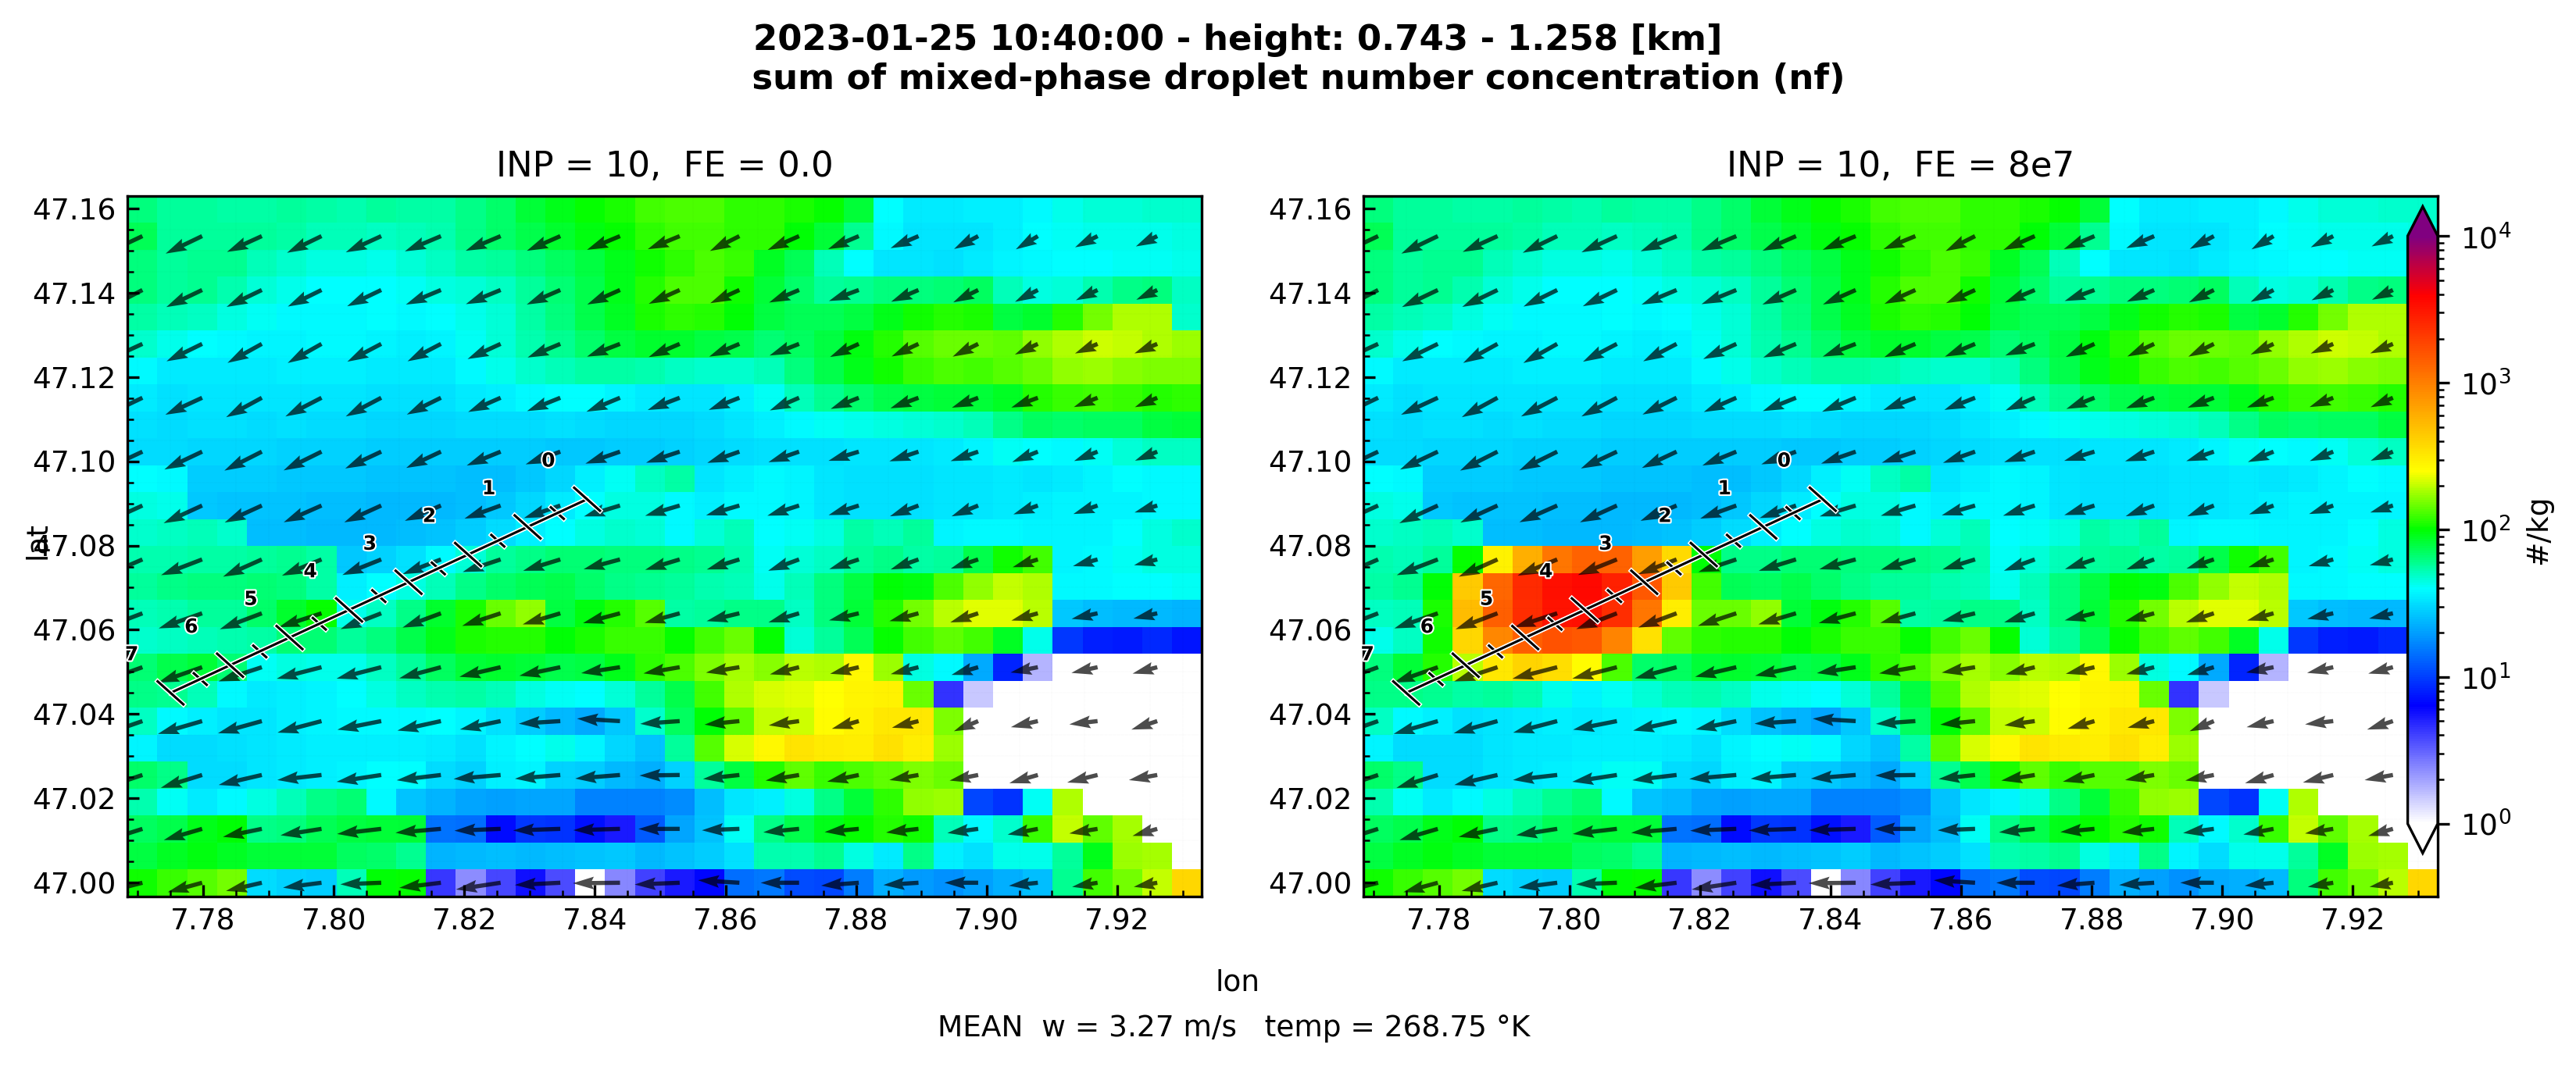

In [11]:

importlib.reload(vizz)

key = next(iter(data))
var_name = 'nf'

plot1 = vizz.MultiPanelPlot(
    data, 
    metadata    = metadata,
    varname     = var_name, 
    nrows       = 1, 
    ncols       = 2, 
    mode        = 'area', 
    vmin        = 1.0, 
    vmax        = 1.0e4,
    timeframe   = 'single', # 'all', 'single'
    timestep0   = 400,
    latlon      = True,
    windvectors = True
    )



# Define start and end points for the ruler
lat_start, lon_start = 47.045, 7.775
lat_end, lon_end = 47.0910, 7.8388
iha, ihe = 41, 49

plot1.add_ruler(lat_start, lon_start, lat_end, lon_end)


for i in tqdm(range(400, 401)):

    tit = f"{data[key].time.values[i]}"
    dt0 = datetime.datetime.strptime(metadata[key[3:]]["RUNCTL.ydate_ini"], "%Y%m%d%H")
    dti = dt0 + i*datetime.timedelta(seconds=15)
    tit = f'{str(dti)} - height: {plot1.height[ihe]:.3f} - {plot1.height[iha]:.3f} [km]\n\
          sum of {data[next(iter(data))][var_name].attrs["long_name"]} ({var_name})'
    
    plot1.display(timestep=i, title=tit)
    plot1.save_figure(f'/{plots_path}/{str(i).zfill(3)}_nf.png')

# Create the meteogram station list from the connecting line or two points in lat-lon space

In [22]:
# Compute the indices in a 2D domain that a straight line crosses.
idX, idY = vizz.line_indices(plot1.y, plot1.x, lat_start, lon_start, lat_end, lon_end)

print('Print Metegoram station list for track along the flare emission plume\n')
print(' i   j      lat      lon   station_name' )
print('---------------------------------------' )
for i in range(idX.shape[0]):
    print( f'{idX[i]:2d},' , f'{idY[i]:2d},' , f'{plot1.y[idY[i]]:.4f}', ',' , f'{plot1.x[idX[i]]:.4f}', ',' , f"'{str(i).zfill(2)}-' ,")


Print Metegoram station list for track along the flare emission plume

 i   j      lat      lon   station_name
---------------------------------------
 0,  7, 47.0447 , 7.7707 , '00-' ,
 1,  7, 47.0447 , 7.7753 , '01-' ,
 2,  8, 47.0511 , 7.7798 , '02-' ,
 3,  8, 47.0511 , 7.7844 , '03-' ,
 4,  9, 47.0575 , 7.7890 , '04-' ,
 5,  9, 47.0575 , 7.7936 , '05-' ,
 6, 10, 47.0639 , 7.7981 , '06-' ,
 7, 10, 47.0639 , 7.8027 , '07-' ,
 8, 11, 47.0703 , 7.8073 , '08-' ,
 9, 11, 47.0703 , 7.8118 , '09-' ,
10, 12, 47.0767 , 7.8164 , '10-' ,
11, 12, 47.0767 , 7.8210 , '11-' ,
12, 13, 47.0831 , 7.8256 , '12-' ,
13, 13, 47.0831 , 7.8301 , '13-' ,
14, 14, 47.0895 , 7.8347 , '14-' ,
15, 14, 47.0895 , 7.8393 , '15-' ,


# Spectra along the flare emission pathway

0it [00:00, ?it/s]

/sw/spack-levante/mambaforge-22.9.0-2-Linux-x86_64-kptncg/lib/python3.10/site-packages/matplotlib/ticker.py:2789: RuntimeWarning: invalid value encountered in log10
  majorstep_no_exponent = 10 ** (np.log10(majorstep) % 1)


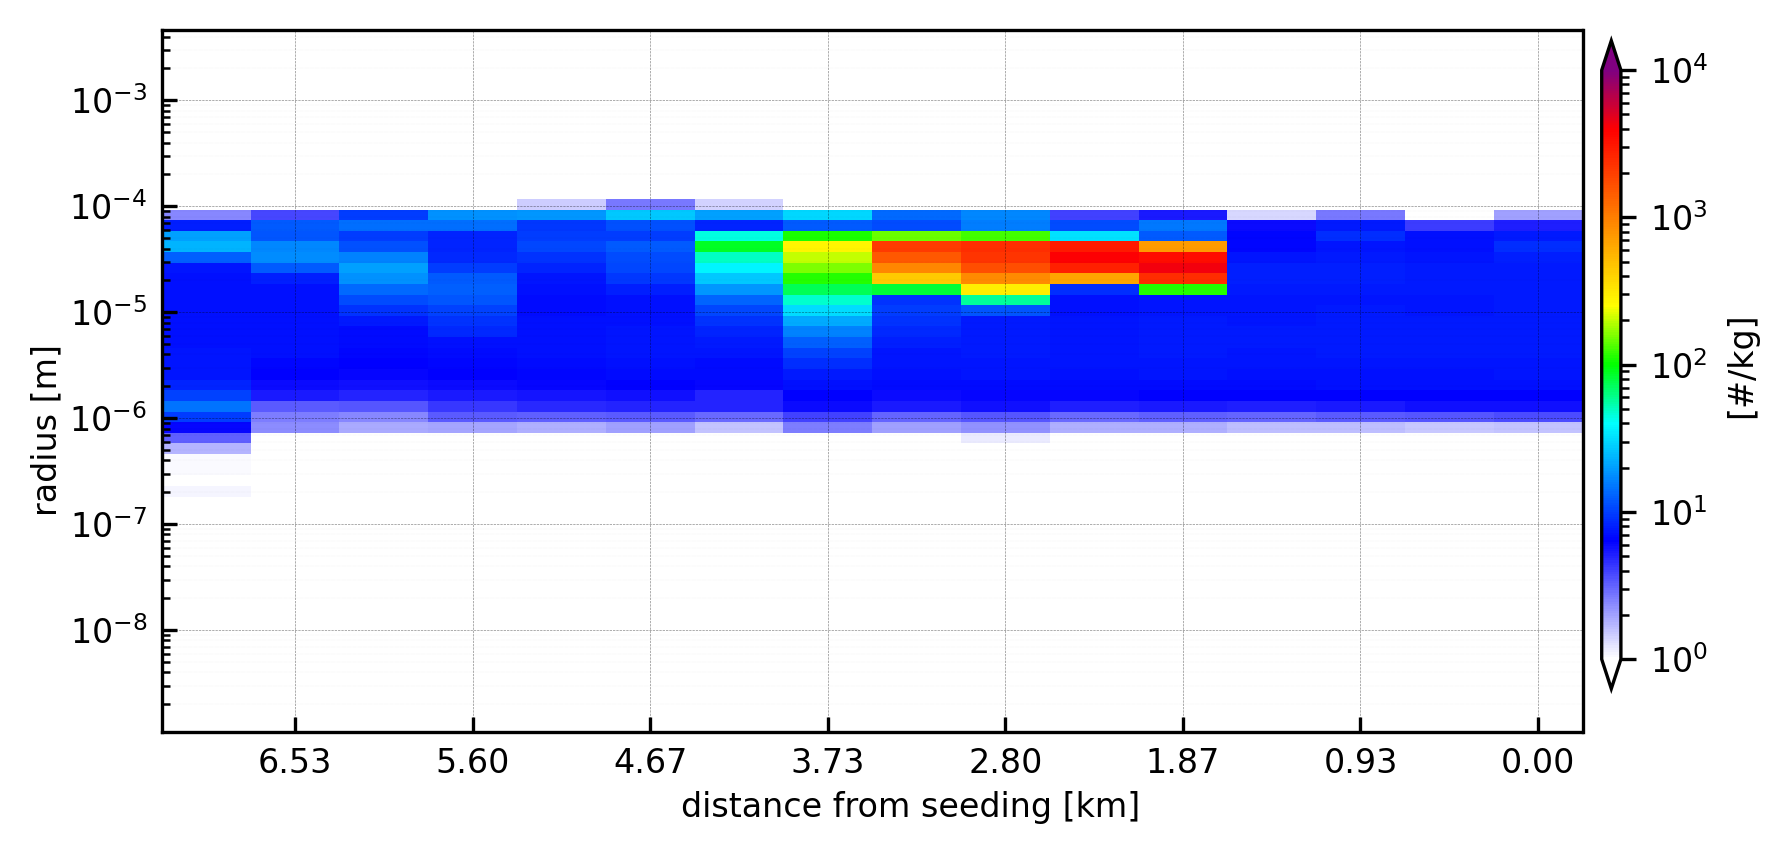

In [29]:

my_dpi = 300

plt.rcParams.update({'font.size': 8})
fig, ax = plt.subplots(figsize=(1920/my_dpi, 1080/my_dpi), dpi=my_dpi)


xx = [f'{7*i/(n_profile-1):.2f}' for i in range(n_profile)]
yy = plot1.rgrenz

z0 = ds[:, iha:ihe, :, :, :].sum('z').values
zz = np.zeros((plot1.time.size, n_profile, plot1.bins.size))

for i in range(n_profile):
    zz[:, i, :] = z0[:, idY[i], idX[i], :]

tt = np.linspace(340, 480, 480-340)
cmap = mpl.colors.LinearSegmentedColormap.from_list(
    'mycmap', [
        (0, 'white'), (0.2, 'blue'), (0.4, 'cyan'), (0.5, 'lime'), 
        (0.6, 'yellow'), (0.9, 'red'), (1, 'purple')
        ]
    ) 
norm = colors.LogNorm(1.0, 1.0e4)
cbar_ax = fig.add_axes([0.86, 0.21, 0.01, 0.6])  # adjust6 these values as needed
cbar = fig.colorbar(
    cm.ScalarMappable(norm=norm, cmap=cmap), 
    cax=cbar_ax, 
    orientation='vertical', 
    extend='both', 
    )
cbar.set_label(f"[{ds.attrs['units']}]")
pmesh = ax.pcolormesh(xx[::-1], yy, zz[380, :, :].T, norm=norm, cmap=cmap)

fig.text(0.5, 0.1, 'distance from seeding [km]', ha='center', va='center')
fig.text(0.05, 0.45, 'radius [m]', ha='center', va='center', rotation='vertical')


ax.set_xticks(xx[::2])
ax.set_xticklabels(xx[::2])

ax.set_yscale('log')
ax.tick_params(which='both', direction='in')
ax.minorticks_on()
ax.grid(True, which='major', linestyle='--', linewidth='0.15', color='black', alpha=0.5)
ax.grid(True, which='minor', linestyle=':', linewidth='0.05', color='black', alpha=0.25)

fig.subplots_adjust(hspace=0.3, wspace=0.15, left=0.11, right=0.85, top=0.82, bottom=0.17)  # make space for colorbar

for iT in tqdm(range(720,720)):

    dt0 = datetime.datetime.strptime(metadata[key[3:]]["RUNCTL.ydate_ini"], "%Y%m%d%H")
    dti = dt0 + iT*datetime.timedelta(seconds=15)
    ax.set_title(f'{str(dti)} - height: {plot1.height[ihe]:.3f} - {plot1.height[iha]:.3f} [km]\n\
                 sum of {ds.attrs["long_name"]} ({var_name})', weight='bold')

    pmesh.set_array(zz[iT, :, :].ravel(order='F'))   
    fig.savefig(f'/{plots_path}/{str(iT).zfill(3)}_crosssection.png', dpi=my_dpi, facecolor='white')


# Single spectra from 3D output

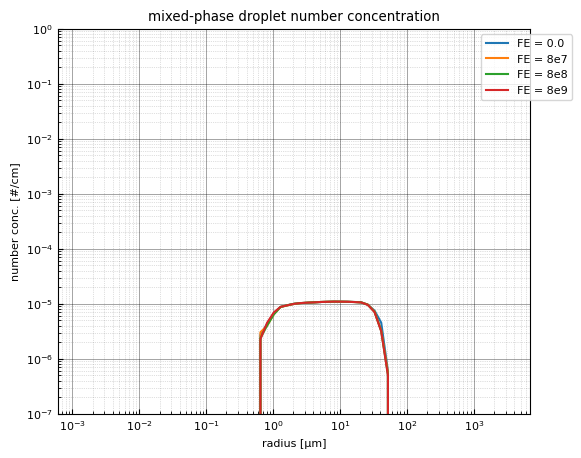

In [46]:
date = '3D_20230821_172722'

t, h, x, y = 400, 42, 6, 10 
t, h, x, y = 400, 42, 6, 10

var = 'nf'
radius = vizz.RGRENZ * 1.0e6 # m to µm
fac = 1/np.diff(np.log10(radius)) * 1.0e-6

fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(7,5))
for date in date_list[:4]:
    air_density = data[date]['rho'][t, h, x, y].values
    spectra = data[date][var][t, h, x, y , :-1].values * air_density * fac 
    var_name = data[date][var].attrs['long_name']
    units = data[date][var].attrs['units']
    leg_label = metadata[date[3:]]['FLARE_SBM.flare_emission']

    ax.plot(radius[:-1], spectra, label=f'FE = {leg_label}')
    
ax.set_ylim(1.0e-7, 1.0e0)
ax.set(xlabel='radius [µm]', ylabel=f'number conc. [#/cm]', title=data[date]["nf"].attrs["long_name"])
ax.set_xscale('log')
ax.set_yscale('log')
ax.tick_params(which='both', direction='in')
ax.minorticks_on()
ax.grid(True, which='major', linestyle='-', linewidth='0.5', color='black', alpha=0.5)
ax.grid(True, which='minor', linestyle=':', linewidth='0.5', color='black', alpha=0.25)

plt.legend(loc='upper right',bbox_to_anchor=(1.1, 1))
plt.subplots_adjust(right=0.8)

# todo #/kg to #/cm3

# Plot a single profile for a specific location

/work/bb1262/user/schimmel/cosmo-specs-torch/python/vizz.py:371: UserWarning: This figure was using constrained_layout, but that is incompatible with subplots_adjust and/or tight_layout; disabling constrained_layout.
  print(self.timestep)


0


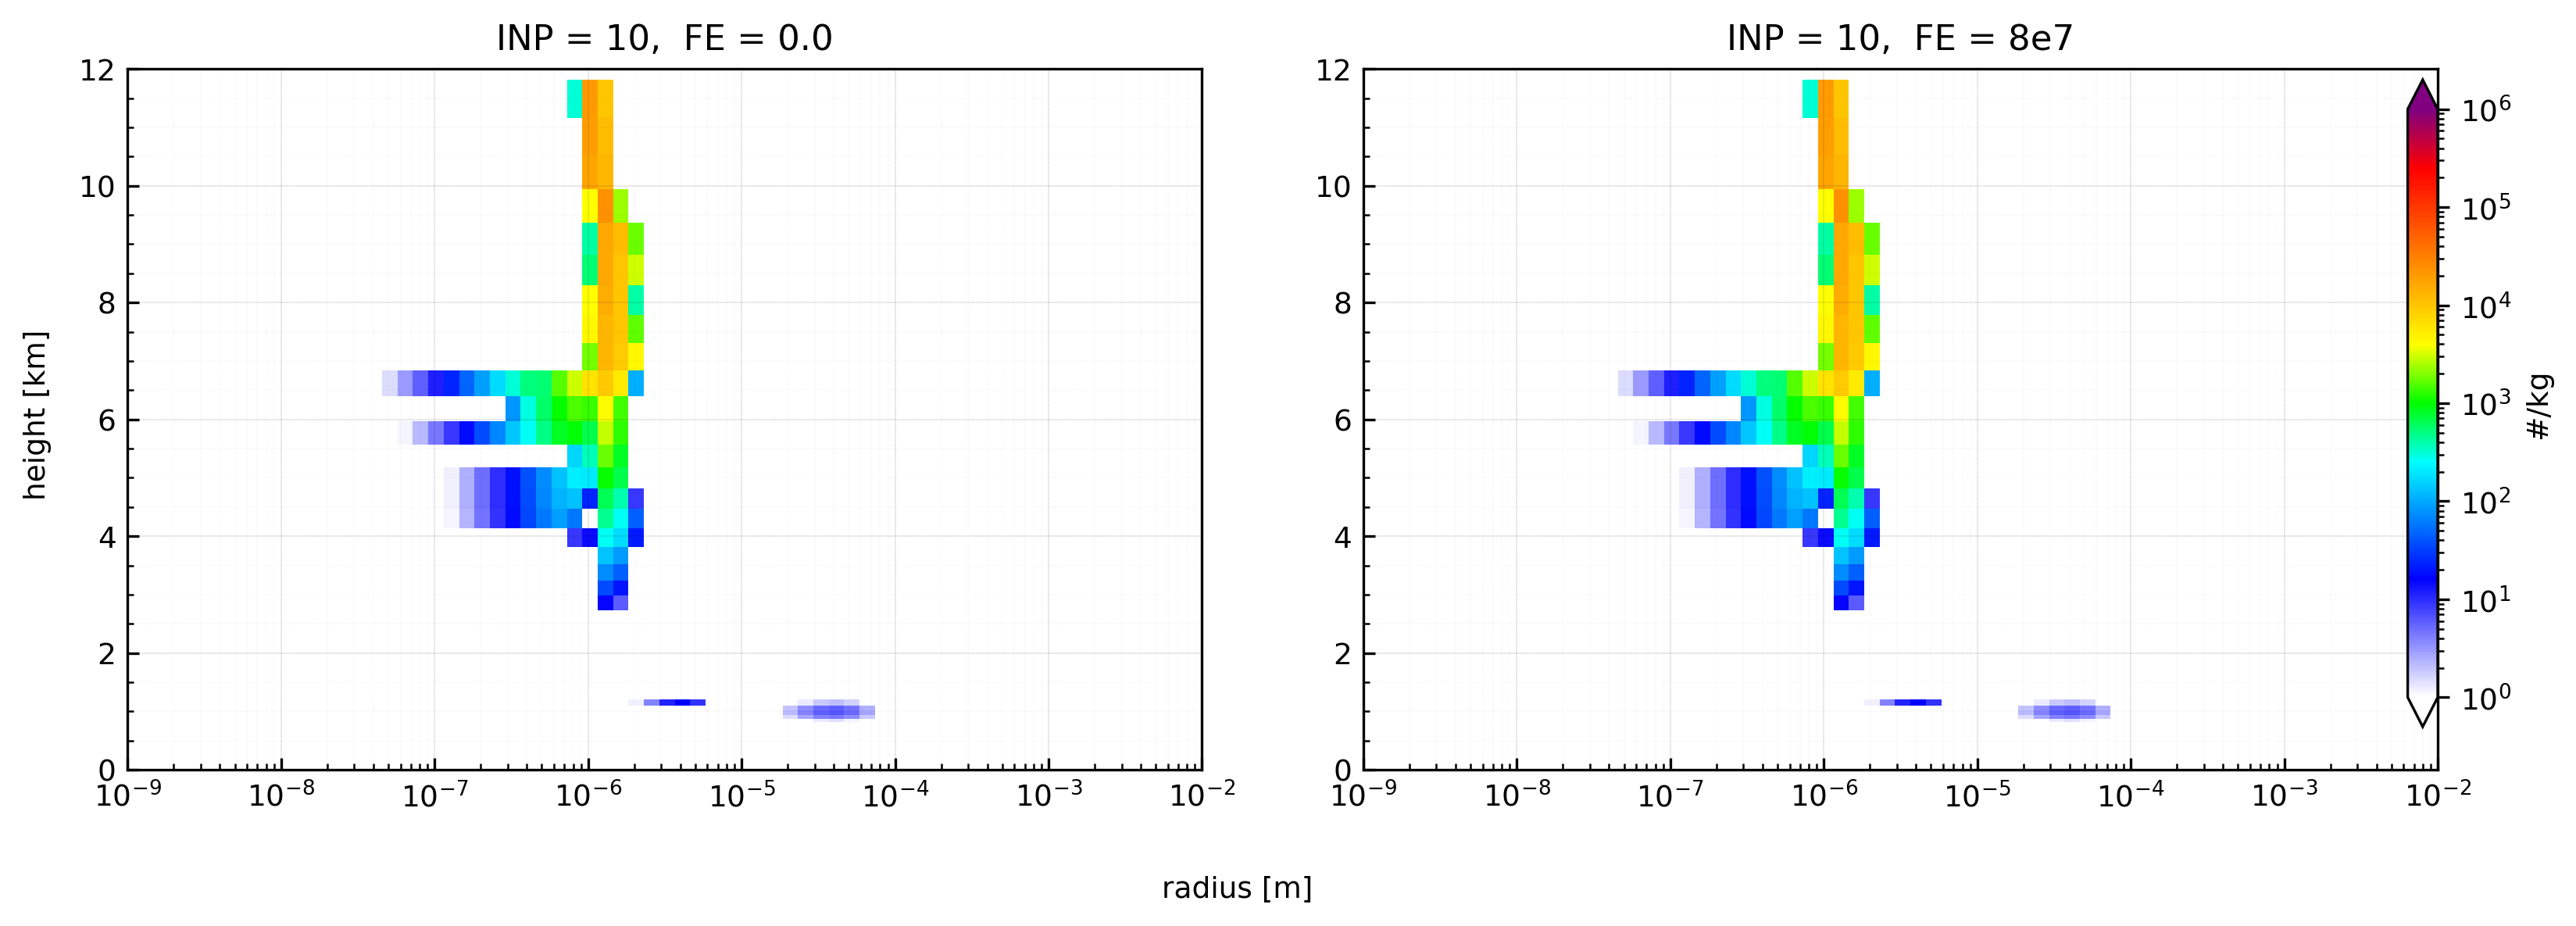

In [24]:

importlib.reload(vizz)

plot2 = vizz.MultiPanelPlot(
    data, 
    metadata    = metadata,
    varname     = 'nf', 
    nrows       = 1, 
    ncols       = 2, 
    mode        = 'profile',
    ymin        = 0, 
    ymax        = 12,
    vmin        = 1, 
    vmax        = 1.0e6,
    grid        = True,
    )

/work/bb1262/user/schimmel/cosmo-specs-torch/python/vizz.py:361: UserWarning: This figure was using constrained_layout, but that is incompatible with subplots_adjust and/or tight_layout; disabling constrained_layout.
  self.fig.subplots_adjust(hspace=0.3, wspace=0.15, left=0.15, right=0.88, top=0.82, bottom=0.17)  # make space for colorbar


0


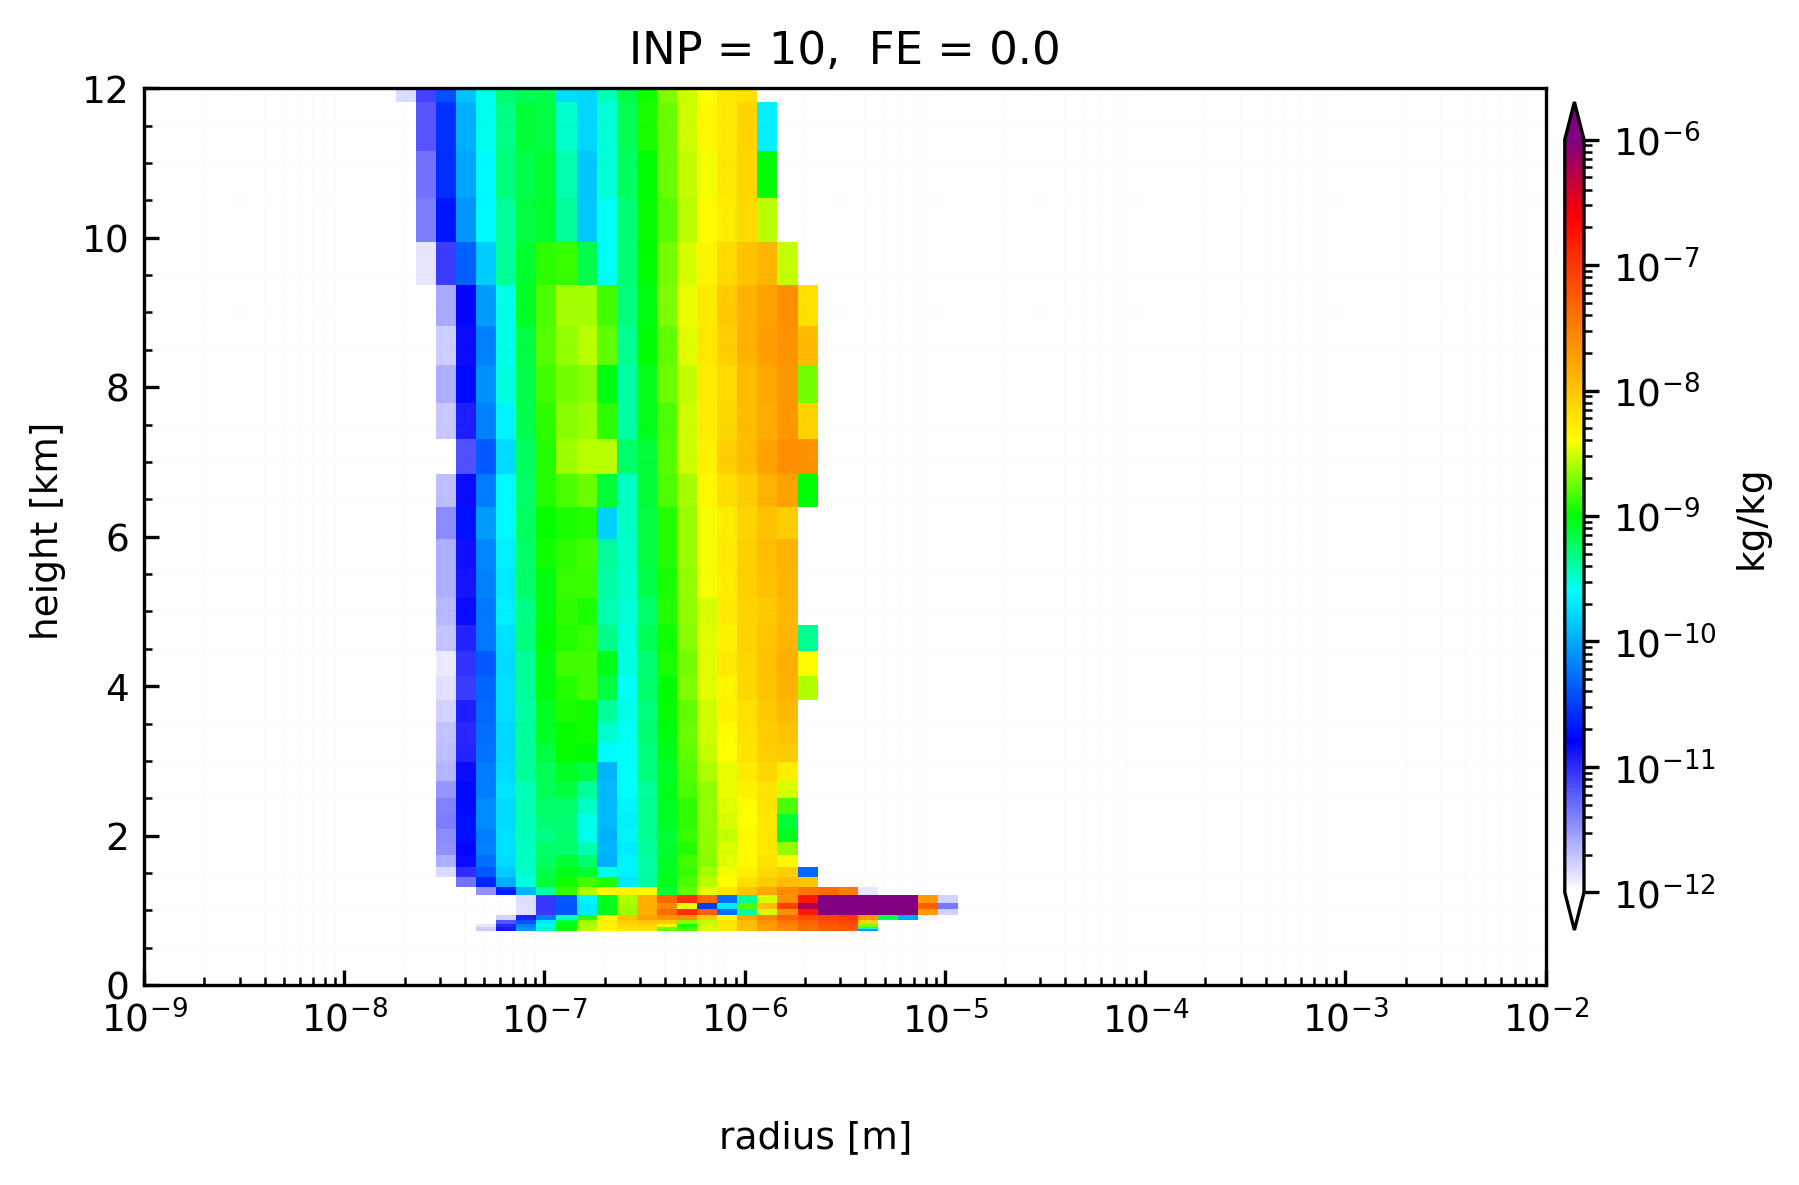

In [18]:
plot3 = vizz.MultiPanelPlot(
    data, 
    metadata    = metadata,
    varname     = 'qw', 
    nrows       = 1, 
    ncols       = 1, 
    mode        = 'profile',
    ymin        = 0, 
    ymax        = 12,
    vmin        = 1e-12, 
    vmax        = 1e-6,
    )
    

# Plot a time series of a specific location

46.999900000000004 47.1599 7.7707 7.9307
0


/work/bb1262/user/schimmel/cosmo-specs-torch/python/vizz.py:369: UserWarning: This figure was using constrained_layout, but that is incompatible with subplots_adjust and/or tight_layout; disabling constrained_layout.
  self.fig.subplots_adjust(hspace=0.3, wspace=0.15, left=0.13, right=0.9, top=0.82, bottom=0.17)  # make space for colorbar


Text(0.5, 0.98, 'lat/lon :: 47.0575/7.7936  dist = 3.230\nTime Series of sum of mixed-phase droplet number concentration (nf)')

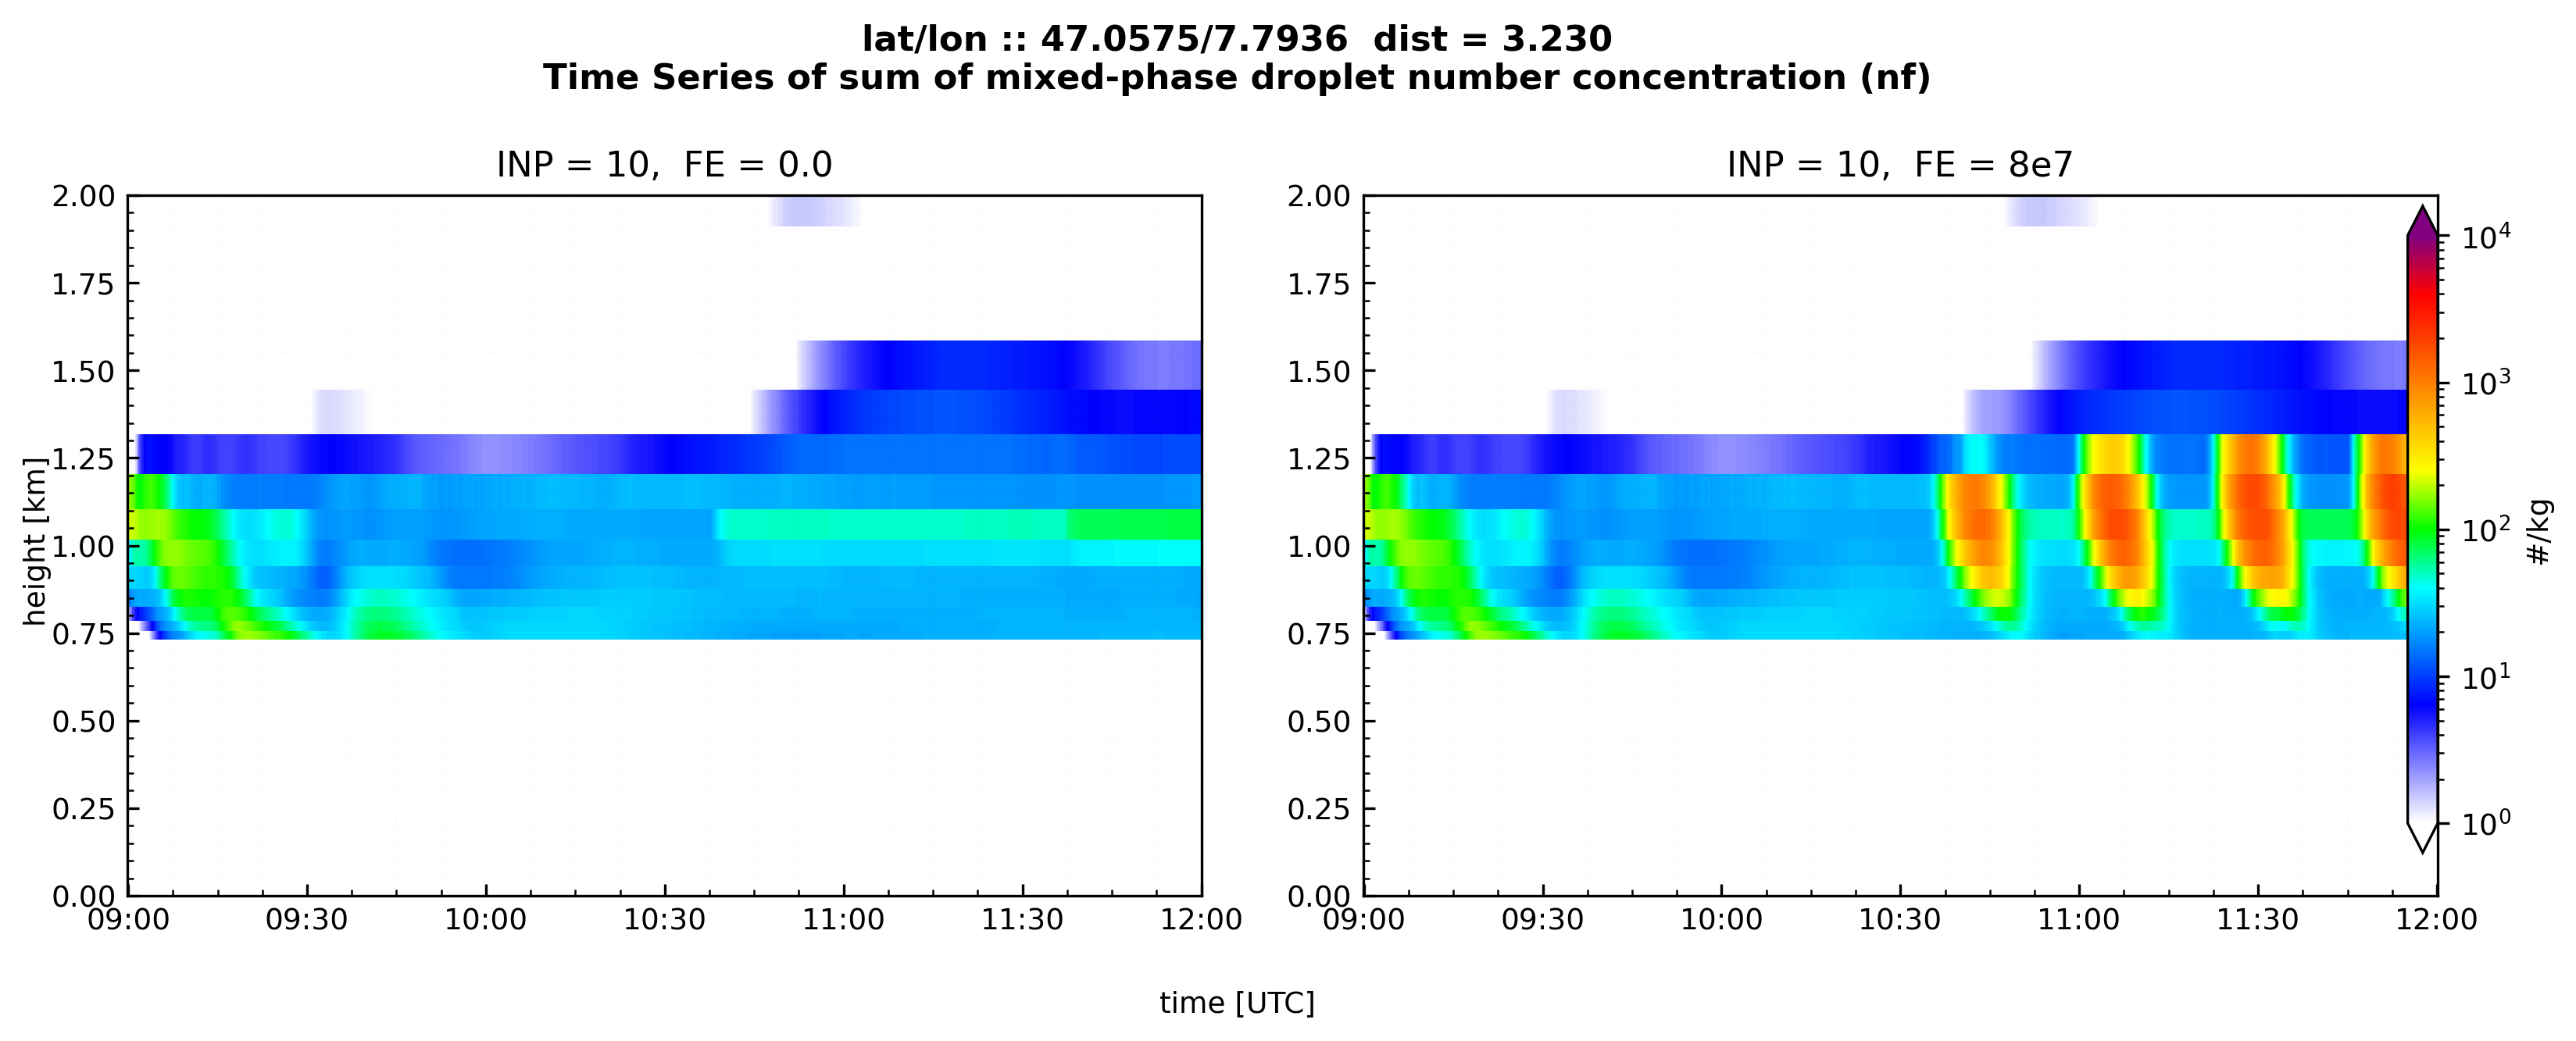

In [14]:
importlib.reload(vizz)


iidX, iidY = 5, 9
var_name = 'nf'

plot5 = vizz.MultiPanelPlot(
    data, 
    metadata    = metadata,
    varname     = var_name, 
    nrows       = 1, 
    ncols       = 2, 
    mode        = 'timeseries',
    ymin        = 0, 
    ymax        = 2,
    latlon      = True,
    idX         = iidX,
    idY         = iidY,
    )

# add figure title
name = data[next(iter(data))]['nf'].attrs["long_name"]
lat, lon = plot5.y[iidY], plot5.x[iidX]
dist = vizz.haversine_distance(plot5.y[12], plot5.x[12], plot5.y[iidY], plot5.x[iidX]) * 1.0e-3
plot5.fig.suptitle(
    f'lat/lon :: {lat:.4f}/{lon:.4f}  dist = {dist:.3f}\nTime Series of sum of {name} ({var_name})', weight='bold')
    

In [23]:
list(data.keys())

['3D_20230821_172639',
 '3D_20230821_172722',
 '3D_20230821_172859',
 '3D_20230821_172929',
 '3D_20230821_173020',
 '3D_20230821_173051',
 '3D_20230821_173224',
 '3D_20230821_173311',
 '3D_20230821_173350',
 '3D_20230821_173420',
 '3D_20230821_173511',
 '3D_20230821_173542']

In [24]:
data[next(iter(data))].z[41].values

array(41)

In [25]:
data[next(iter(data))]
HHLd = np.array(
    [21.500002  , 20.514286  , 19.556965  , 18.62768   , 17.72607   ,
    16.851786  , 16.004465  , 15.183751  , 14.389286  , 13.620715  ,
    12.87768   , 12.159819  , 11.474235  , 10.83433   , 10.231516  ,
    9.650918  ,  9.092202  ,  8.555033  ,  8.039072  ,  7.5439944 ,
    7.069464  ,  6.615141  ,  6.180692  ,  5.76579   ,  5.370097  ,
    4.993273  ,  4.634993  ,  4.294922  ,  3.9727197 ,  3.6680555 ,
    3.3805976 ,  3.110009  ,  2.855953  ,  2.6181023 ,  2.3961203 ,
    2.18967   ,  1.9984195 ,  1.8220367 ,  1.6601849 ,  1.5125275 ,
    1.3787366 ,  1.2584761 ,  1.151409  ,  1.0572032 ,  0.9755266 ,
    0.9060427 ,  0.84841454,  0.8023148 ,  0.76740676,  0.7433537 ]
    )

HHLd[41]

1.2584761

In [26]:
data_path

'/work/bb1262/user/schimmel/cosmo-specs-torch/cosmo-specs/testcases/RUN_ERISWILL_TESTCASE01/'

In [27]:
# distance between to grid points
lat_start, lon_start = 47.045, 7.775
lat_end, lon_end = 47.0910, 7.8388

dx = vizz.haversine_distance(lat_start, lon_start, lat_start, lon_start+0.005)
dy = vizz.haversine_distance(lat_start, lon_start, lat_start+0.005, lon_start)



In [28]:
print(dx, dy)

print(HHLd)
print(np.sum(HHLd))
print(np.diff(HHLd))

378.8543171440329 555.9746332234664
[21.500002   20.514286   19.556965   18.62768    17.72607    16.851786
 16.004465   15.183751   14.389286   13.620715   12.87768    12.159819
 11.474235   10.83433    10.231516    9.650918    9.092202    8.555033
  8.039072    7.5439944   7.069464    6.615141    6.180692    5.76579
  5.370097    4.993273    4.634993    4.294922    3.9727197   3.6680555
  3.3805976   3.110009    2.855953    2.6181023   2.3961203   2.18967
  1.9984195   1.8220367   1.6601849   1.5125275   1.3787366   1.2584761
  1.151409    1.0572032   0.9755266   0.9060427   0.84841454  0.8023148
  0.76740676  0.7433537 ]
360.43145739999994
[-0.985716   -0.957321   -0.929285   -0.90161    -0.874284   -0.847321
 -0.820714   -0.794465   -0.768571   -0.743035   -0.717861   -0.685584
 -0.639905   -0.602814   -0.580598   -0.558716   -0.537169   -0.515961
 -0.4950776  -0.4745304  -0.454323   -0.434449   -0.414902   -0.395693
 -0.376824   -0.35828    -0.340071   -0.3222023  -0.3046642  -0.28

In [29]:
i_meteo = '08'
meteo_path = data_path + f'M_{i_meteo}-20230826_173042.nc'
ds_meteo = xr.open_mfdataset(meteo_path)

In [43]:
ds_meteo

<xarray.Dataset>
Dimensions:              (time: 316, HHLd: 241, HMLd: 240, pathway: 6,
                          bins: 66, tfr: 30)
Coordinates:
  * time                 (time) datetime64[ns] 2023-01-25T09:00:30 ... 2023-0...
  * HHLd                 (HHLd) float32 768.0 777.0 786.6 ... 2.1e+04 2.2e+04
  * HMLd                 (HMLd) float32 777.3 786.3 801.3 ... 2.051e+04 2.15e+04
Dimensions without coordinates: pathway, bins, tfr
Data variables: (12/136)
    RGRENZ_left          (pathway, bins) float32 dask.array<chunksize=(1, 66), meta=np.ndarray>
    RGRENZ_right         (pathway, bins) float32 dask.array<chunksize=(1, 66), meta=np.ndarray>
    U                    (pathway, time, HMLd) float32 dask.array<chunksize=(1, 316, 240), meta=np.ndarray>
    V                    (pathway, time, HMLd) float32 dask.array<chunksize=(1, 316, 240), meta=np.ndarray>
    W                    (pathway, time, HHLd) float32 dask.array<chunksize=(1, 316, 241), meta=np.ndarray>
    T                    (pathway, time, HMLd) float32 dask.array<chunksize=(1, 316, 240), meta=np.ndarray>
    ...                   ...
    SUM_N_kqwf           (pathway, time, HMLd, bins) float32 dask.array<chunksize=(1, 316, 240, 66), meta=np.ndarray>
    SUM_N_dqfwmelt       (pathway, time, HMLd, bins) float32 dask.array<chunksize=(1, 316, 240, 66), meta=np.ndarray>
    SUM_N_HOMN           (pathway, time, HMLd, bins) float32 dask.array<chunksize=(1, 316, 240, 66), meta=np.ndarray>
    SUM_N_HOMQ           (pathway, time, HMLd, bins) float32 dask.array<chunksize=(1, 316, 240, 66), meta=np.ndarray>
    VW                   (pathway, time, HMLd, bins) float32 dask.array<chunksize=(1, 316, 240, 66), meta=np.ndarray>
    VF                   (pathway, time, HMLd, bins) float32 dask.array<chunksize=(1, 316, 240, 66), meta=np.ndarray>

In [42]:
[f'{data_path}{name}' for name in ['3D_20230830_111543.nc', '3D_20230830_111709.nc']]

['/work/bb1262/user/schimmel/cosmo-specs-torch/cosmo-specs/testcases/RUN_ERISWILL_TESTCASE01/3D_20230830_111543.nc',
 '/work/bb1262/user/schimmel/cosmo-specs-torch/cosmo-specs/testcases/RUN_ERISWILL_TESTCASE01/3D_20230830_111709.nc']

In [44]:

importlib.reload(vizz)

key = '3D_20230821_172859'
var_name = 'nf'

with open(f'{data_path}cs-eriswil__20230830_111543.json') as f:
   metadata2 = json.load(f)

plot1 = vizz.MultiPanelPlot(
    [f'{data_path}{name}' for name in ['3D_20230830_111543.nc', '3D_20230830_111709.nc']], 
    metadata    = metadata2,
    varname     = var_name, 
    nrows       = 1, 
    ncols       = 2, 
    mode        = 'area', 
    vmin        = 1.0, 
    vmax        = 1.0e4,
    timeframe   = 'single', # 'all', 'single'
    timestep0   = 400,
    latlon      = True,
    windvectors = False
    )



KeyError: 'rk/bb1262/user/schimmel/cosmo-specs-torch/cosmo-specs/testcases/RUN_ERISWILL_TESTCASE01/3D_20230830_111543.nc'

In [37]:
Zn.shape

(56, 26, 36)

  0%|          | 0/5 [00:00<?, ?it/s]

IndexError: Index 53 is out of bounds for axis 0 with size 53

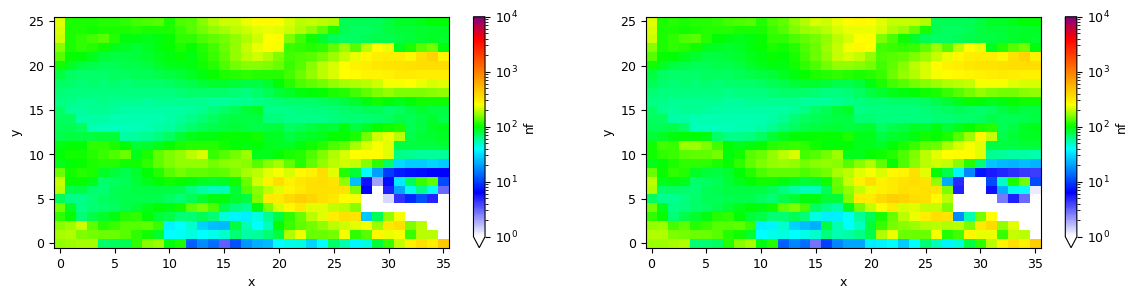

In [38]:

norm = colors.LogNorm(1.0, 1.0e4)
ds_3d_n = xr.open_mfdataset(f'{data_path}3D_20230830_111543.nc')
ds_3d_f = xr.open_mfdataset(f'{data_path}3D_20230830_111709.nc')
Zn = ds_3d_n['nf'][:, 41:45, :, :, :].sum(('z', 'bin'))
Zf = ds_3d_f['nf'][:, 41:45, :, :, :].sum(('z', 'bin'))

fig10, ax10 = plt.subplots(ncols=2, figsize=(14, 3))
pmeshn = Zn[20, :, :].plot(ax=ax10[0], norm=norm, cmap=cmap)
pmeshf = Zf[20, :, :].plot(ax=ax10[1], norm=norm, cmap=cmap)

for i in tqdm(range(52, Zn.time.size)):
    pmeshn.set_array(Zn[i, :, :].values.ravel())
    pmeshf.set_array(Zf[i, :, :].values.ravel())
    fig10.savefig(f'{plots_path}/{i}-test.png')

In [11]:
np.sqrt((9*0.380)**2 + (4*0.550)**2)

4.06649726423122

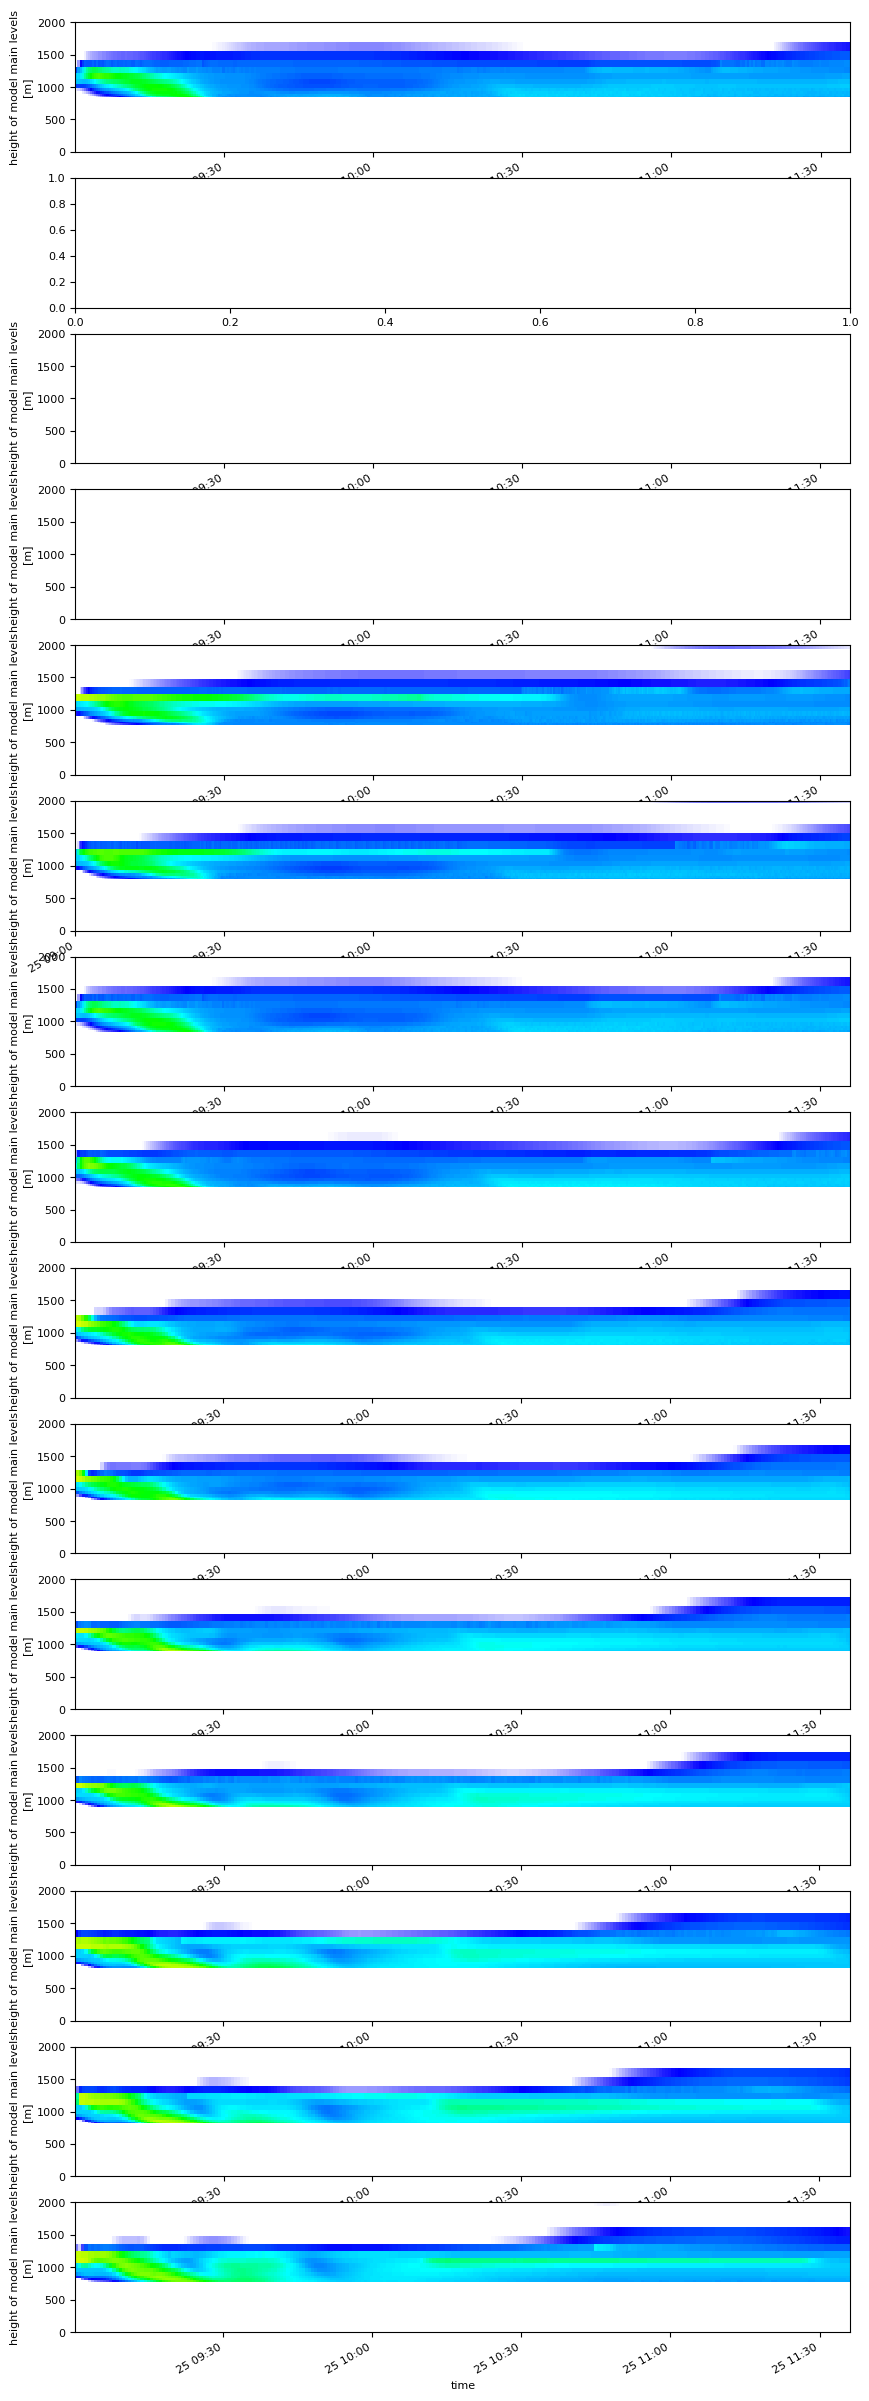

In [47]:
fig8, ax8 = plt.subplots(nrows=15, figsize=(10, 30))


for i in range(0, 15): 
    try:
        ds_meteo7 = xr.open_mfdataset(
            f'/work/bb1262/user/schimmel/cosmo-specs-torch/cosmo-specs/testcases/RUN_ERISWILL_TESTCASE01/M_{str(i).zfill(2)}-20230826_173042.nc'
            )
    except:
        continue
    #ds_meteo7['QI'].T.plot()

    norm = colors.LogNorm(1.0, 1.0e4)
    ds_meteo7['NF'].sum('bins').T.plot(ax = ax8[i], norm=norm, cmap=cmap, add_colorbar=False)
    ax8[i].set_ylim(0, 2000)

In [34]:

# for i in range(5, 13):
#     x = ds_meteo.time.values
#     y = ds_meteo.HMLd.values
#     ds_meteo = xr.open_mfdataset(f'{data_path}/M_{str(i+2).zfill(2)}-20230826_173042.nc')

#     try:
#         pm1 = ax3[i, 0].pcolormesh(x, y, ds_meteo['QI'].values.T, norm=colors.LogNorm(1.0e-10, 1.0e-6), cmap=cmap)
#         pm2 = ax3[i, 1].pcolormesh(x, y, ds_meteo['QC'].values.T, norm=colors.LogNorm(1.0e-7, 1.0e-2), cmap=cmap)
#         ax3[i, 0].set_ylim(0,2000)
#         ax3[i, 1].set_ylim(0,2000)
#     except:
#         pass



In [35]:

meteo_paths = []
for i in range(8, 14):

    i_meteo = str(i+2).zfill(2)
    meteo_paths.append(f'{data_path}/M_{i_meteo}-20230826_173042.nc')

meteo_paths = sorted(meteo_paths)
print(meteo_paths)

ds_meteo = xr.open_mfdataset(meteo_paths, concat_dim='pathway', combine='nested')

ds_meteo

['/work/bb1262/user/schimmel/cosmo-specs-torch/cosmo-specs/testcases/RUN_ERISWILL_TESTCASE01//M_10-20230826_173042.nc', '/work/bb1262/user/schimmel/cosmo-specs-torch/cosmo-specs/testcases/RUN_ERISWILL_TESTCASE01//M_11-20230826_173042.nc', '/work/bb1262/user/schimmel/cosmo-specs-torch/cosmo-specs/testcases/RUN_ERISWILL_TESTCASE01//M_12-20230826_173042.nc', '/work/bb1262/user/schimmel/cosmo-specs-torch/cosmo-specs/testcases/RUN_ERISWILL_TESTCASE01//M_13-20230826_173042.nc', '/work/bb1262/user/schimmel/cosmo-specs-torch/cosmo-specs/testcases/RUN_ERISWILL_TESTCASE01//M_14-20230826_173042.nc', '/work/bb1262/user/schimmel/cosmo-specs-torch/cosmo-specs/testcases/RUN_ERISWILL_TESTCASE01//M_15-20230826_173042.nc']


<xarray.Dataset>
Dimensions:              (time: 316, HHLd: 241, HMLd: 240, pathway: 6,
                          bins: 66, tfr: 30)
Coordinates:
  * time                 (time) datetime64[ns] 2023-01-25T09:00:30 ... 2023-0...
  * HHLd                 (HHLd) float32 768.0 777.0 786.6 ... 2.1e+04 2.2e+04
  * HMLd                 (HMLd) float32 777.3 786.3 801.3 ... 2.051e+04 2.15e+04
Dimensions without coordinates: pathway, bins, tfr
Data variables: (12/136)
    RGRENZ_left          (pathway, bins) float32 dask.array<chunksize=(1, 66), meta=np.ndarray>
    RGRENZ_right         (pathway, bins) float32 dask.array<chunksize=(1, 66), meta=np.ndarray>
    U                    (pathway, time, HMLd) float32 dask.array<chunksize=(1, 316, 240), meta=np.ndarray>
    V                    (pathway, time, HMLd) float32 dask.array<chunksize=(1, 316, 240), meta=np.ndarray>
    W                    (pathway, time, HHLd) float32 dask.array<chunksize=(1, 316, 241), meta=np.ndarray>
    T                    (pathway, time, HMLd) float32 dask.array<chunksize=(1, 316, 240), meta=np.ndarray>
    ...                   ...
    SUM_N_kqwf           (pathway, time, HMLd, bins) float32 dask.array<chunksize=(1, 316, 240, 66), meta=np.ndarray>
    SUM_N_dqfwmelt       (pathway, time, HMLd, bins) float32 dask.array<chunksize=(1, 316, 240, 66), meta=np.ndarray>
    SUM_N_HOMN           (pathway, time, HMLd, bins) float32 dask.array<chunksize=(1, 316, 240, 66), meta=np.ndarray>
    SUM_N_HOMQ           (pathway, time, HMLd, bins) float32 dask.array<chunksize=(1, 316, 240, 66), meta=np.ndarray>
    VW                   (pathway, time, HMLd, bins) float32 dask.array<chunksize=(1, 316, 240, 66), meta=np.ndarray>
    VF                   (pathway, time, HMLd, bins) float32 dask.array<chunksize=(1, 316, 240, 66), meta=np.ndarray>

In [36]:
meteo_paths

['/work/bb1262/user/schimmel/cosmo-specs-torch/cosmo-specs/testcases/RUN_ERISWILL_TESTCASE01//M_10-20230826_173042.nc',
 '/work/bb1262/user/schimmel/cosmo-specs-torch/cosmo-specs/testcases/RUN_ERISWILL_TESTCASE01//M_11-20230826_173042.nc',
 '/work/bb1262/user/schimmel/cosmo-specs-torch/cosmo-specs/testcases/RUN_ERISWILL_TESTCASE01//M_12-20230826_173042.nc',
 '/work/bb1262/user/schimmel/cosmo-specs-torch/cosmo-specs/testcases/RUN_ERISWILL_TESTCASE01//M_13-20230826_173042.nc',
 '/work/bb1262/user/schimmel/cosmo-specs-torch/cosmo-specs/testcases/RUN_ERISWILL_TESTCASE01//M_14-20230826_173042.nc',
 '/work/bb1262/user/schimmel/cosmo-specs-torch/cosmo-specs/testcases/RUN_ERISWILL_TESTCASE01//M_15-20230826_173042.nc']

(0.0, 2000.0)

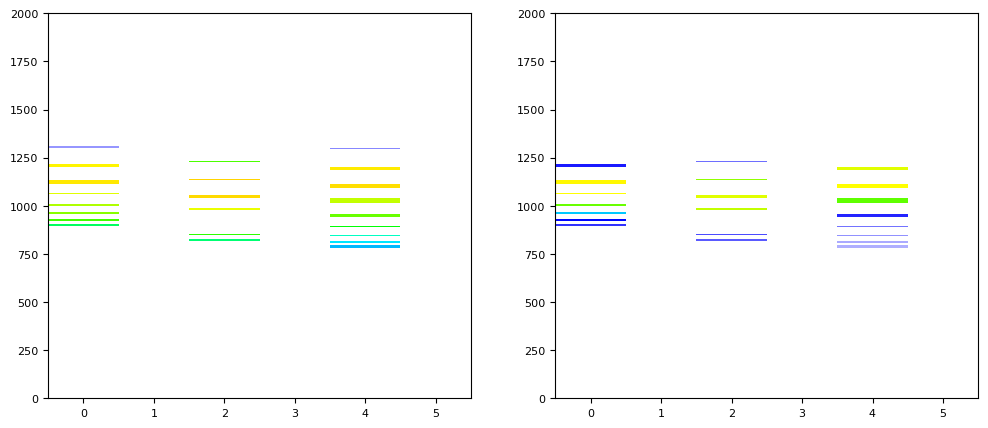

In [37]:


import datetime

import matplotlib.colors as colors
norm = colors.LogNorm(1.0e-10, 1.0e-1)

cmap = mpl.colors.LinearSegmentedColormap.from_list(
    'mycmap', [
        (0, 'white'), (0.2, 'blue'), (0.4, 'cyan'), (0.5, 'lime'), 
        (0.6, 'yellow'), (0.9, 'red'), (1, 'purple')
        ]
    ) 

pmeshs = [] 


fig3, ax3 = plt.subplots(nrows=1, ncols=2, figsize=(12, 5))

x = ds_meteo.time.values
y = ds_meteo.HMLd.values

pm1 = ax3[0].pcolormesh(np.arange(6), y, ds_meteo['QI'][:, 100, :].T.values, norm=colors.LogNorm(1.0e-10, 1.0e-6), cmap=cmap)
pm2 = ax3[1].pcolormesh(np.arange(6), y, ds_meteo['QC'][:, 100, :].T.values, norm=colors.LogNorm(1.0e-7, 1.0e-2), cmap=cmap)
ax3[0].set_ylim(0, 2000)
ax3[1].set_ylim(0, 2000)


# for iP in tqdm(range(1)):

#     # dt0 = datetime.datetime.strptime("2023012509", "%Y%m%d%H")
#     # dti = dt0 + iT*datetime.timedelta(seconds=15)
#     # ax3[0].set_title(f'{str(dti)} - height: {y[4]:.3f} - {y[10]:.3f} [km]\n\
#     #              sum of {ds_meteo["QI"].attrs["standard_name"]}', weight='bold')
    
#     # ax3[1].set_title(f'{str(dti)} - height: {y[4]:.3f} - {y[10]:.3f} [km]\n\
#     #              sum of {ds_meteo["QC"].attrs["standard_name"]}', weight='bold')
    
#     pm1.set_array(ds_meteo['QI'][:, iT, :].values.T.ravel())#order='F'))
#     pm2.set_array(ds_meteo['QC'][:, iT, :].values.T.ravel())#order='F'))
#     fig3.savefig(f'/{plots_path}/{str(iT).zfill(3)}_M_cross.png', dpi=300, facecolor='white')




In [38]:
ds_meteo['VW']

<xarray.DataArray 'VW' (pathway: 6, time: 316, HMLd: 240, bins: 66)>
dask.array<concatenate, shape=(6, 316, 240, 66), dtype=float32, chunksize=(1, 316, 240, 66), chunktype=numpy.ndarray>
Coordinates:
  * time     (time) datetime64[ns] 2023-01-25T09:00:30 ... 2023-01-25T11:11:15
  * HMLd     (HMLd) float32 777.3 786.3 801.3 ... 1.956e+04 2.051e+04 2.15e+04
Dimensions without coordinates: pathway, bins
Attributes:
    standard_name:  fall velocity water droplets
    units:          m s-1